# Citeseer Dataset Pytorch Implementation

## Importing Libraries

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.datasets import Planetoid
import numpy as np

## Loading Dataset

In [8]:
# Load the Citeseer dataset
dataset = Planetoid(root="data/Citeseer", name="Citeseer")
data = dataset[0]
print(dataset)
print(data)
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of classes:\t\t",np.unique(data.y))
print(f"Number of nodes:\t\t",data.num_nodes)
print("number of node features:\t",data.num_node_features)
print("number of edge features:\t",data.num_edge_features)
print("X shape: ", data.x.shape)
print("Edge shape: ", data.edge_index.shape)
print("Y shape: ", data.y.shape)

Citeseer()
Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
number of graphs:		 1
number of classes:		 6
number of classes:		 [0 1 2 3 4 5]
Number of nodes:		 3327
number of node features:	 3703
number of edge features:	 0
X shape:  torch.Size([3327, 3703])
Edge shape:  torch.Size([2, 9104])
Y shape:  torch.Size([3327])


## Grap Visualization

### Basic Graph

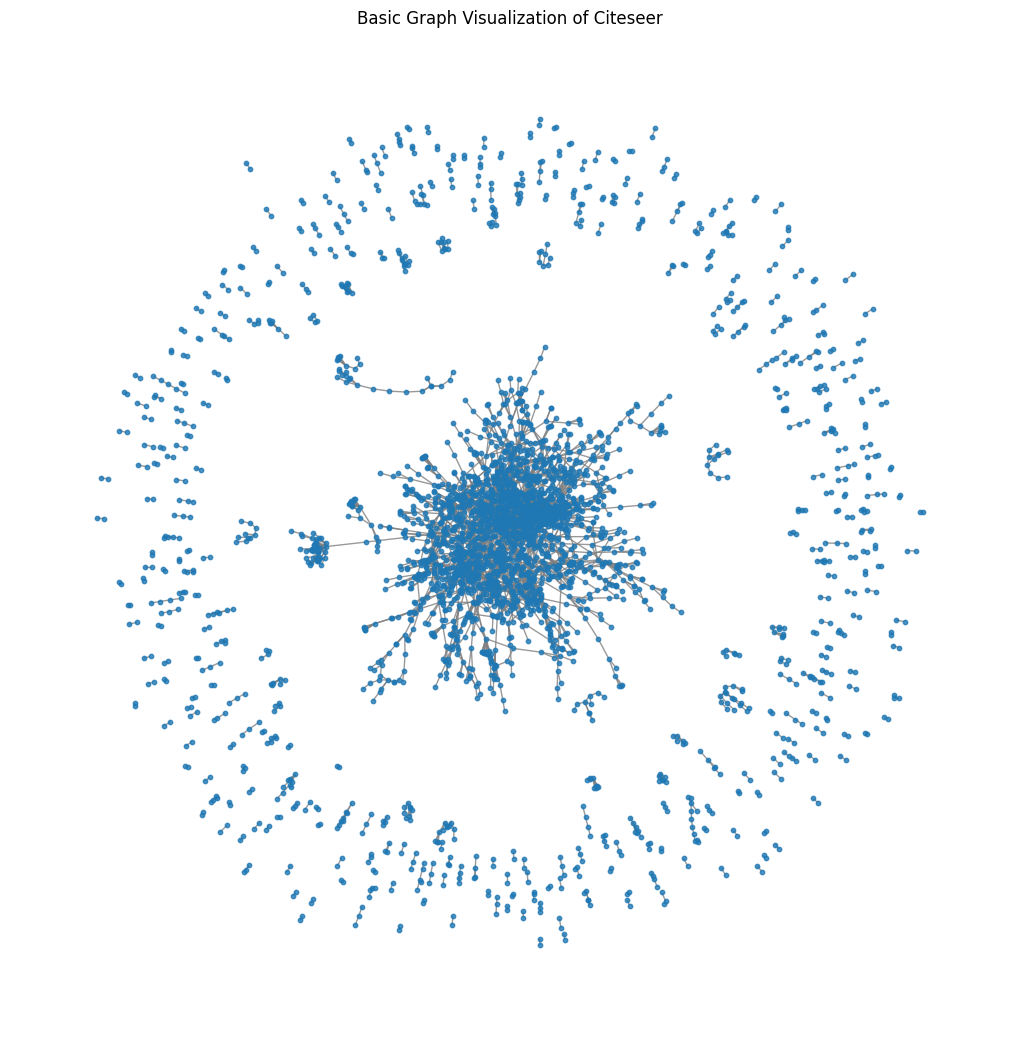

In [9]:
G = nx.Graph()
edges = data.edge_index.t().tolist()
G.add_edges_from(edges)
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10, alpha=0.8, edge_color="gray")
plt.title("Basic Graph Visualization of Citeseer")
plt.show()

### Graph with labels

In [10]:
def visualize_graph(edge_index, labels, num_nodes):
    G = nx.Graph()
    edge_list = edge_index.t().tolist()  
    G.add_edges_from(edge_list)
    G.add_nodes_from(range(num_nodes)) 

    # Ensure labels match number of nodes
    labels = labels[:num_nodes]  # Truncate extra labels if necessary

    # Generate positions for the graph
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for visualization

    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_color=labels,
        cmap=plt.cm.rainbow,
        node_size=50,
    )
    plt.title("Citeseer Graph Structure")
    plt.show()

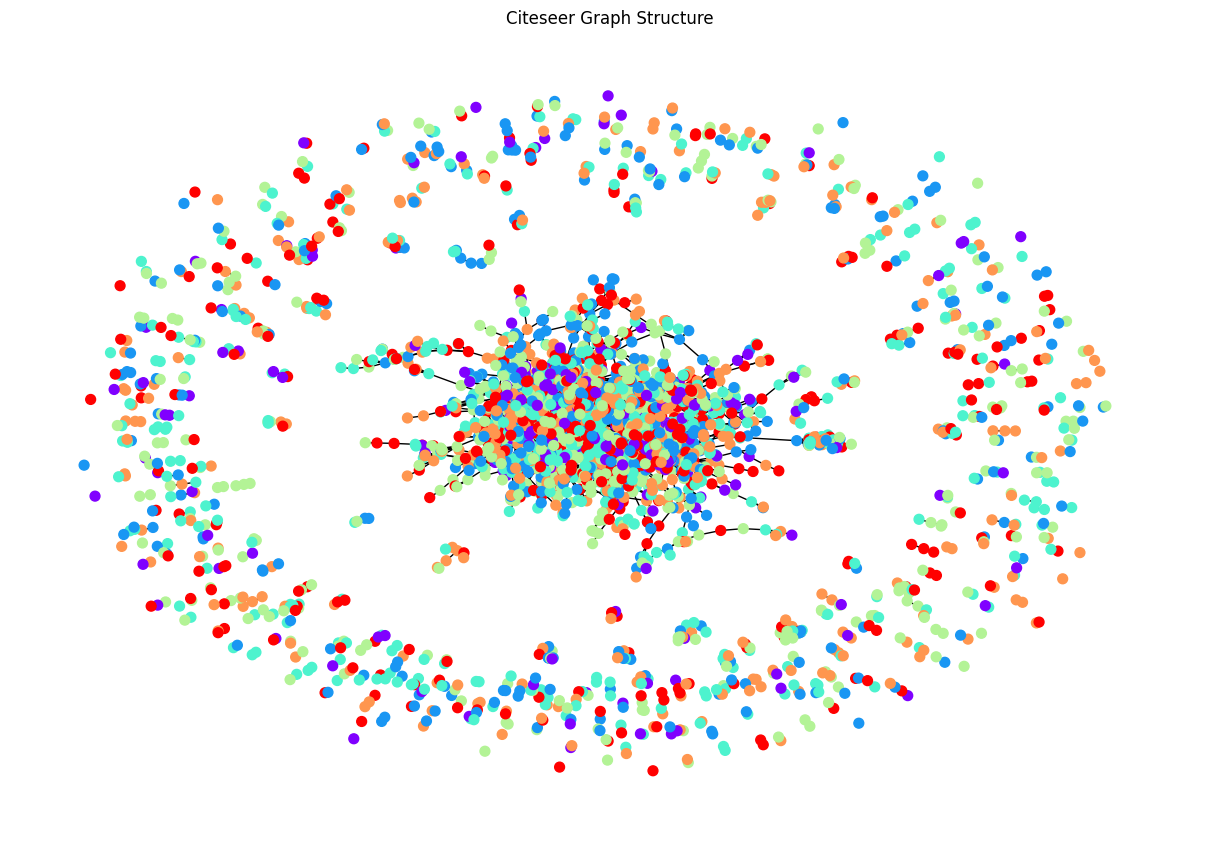

In [11]:
visualize_graph(data.edge_index, data.y.numpy(), data.num_nodes)

### Degree Distribution

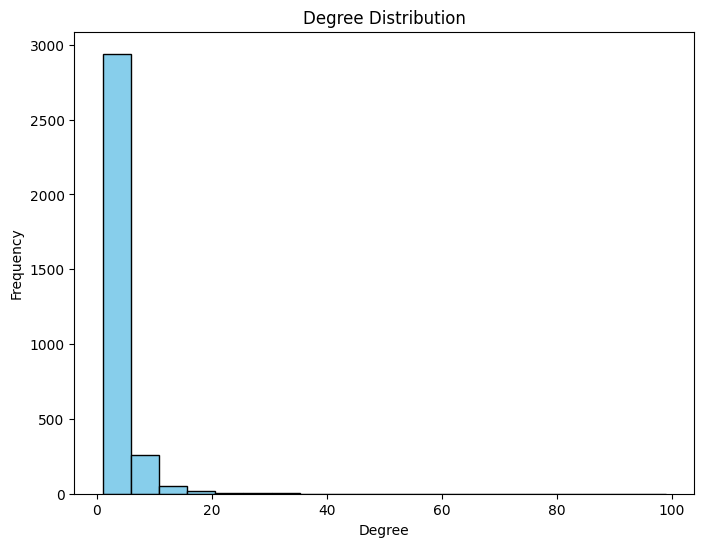

In [13]:
degrees = [G.degree(node) for node in G.nodes]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
